In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/atac_buenrostro2018',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7']

In [3]:
sys.path.insert(1,'/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/')
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/atac_buenrostro2018',
 '/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip']

In [4]:
import simba as si
import os
si.__path__

['/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/simba']

In [5]:
workdir = 'result_buenrostro2018_using_peaks_v4'
si.settings.set_workdir(workdir)

Saving results in: result_buenrostro2018_using_peaks_v4


In [6]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

## preprocessing

In [7]:
adata_CP = si.read_h5ad("./input/data_processed/atac/atac_seq.h5ad")

In [8]:
adata_CP

AnnData object with n_obs × n_vars = 2034 × 237450
    obs: 'celltype'
    var: 'chr', 'start', 'end'

In [9]:
# si.pp.filter_cells_atac(adata,min_n_genes=100)
si.pp.filter_peaks(adata_CP,min_n_cells=3)

Before filtering: 
2034 cells, 237450 peaks
Filter peaks based on min_n_cells


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


After filtering out low-expressed peaks: 
2034 cells, 200167 peaks


In [10]:
si.pp.cal_qc_atac(adata_CP)

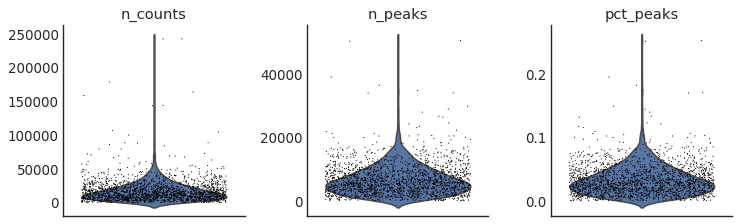

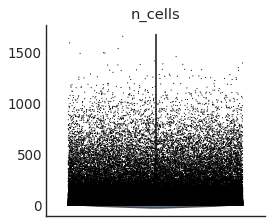

In [11]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'],fig_size=(3,3))

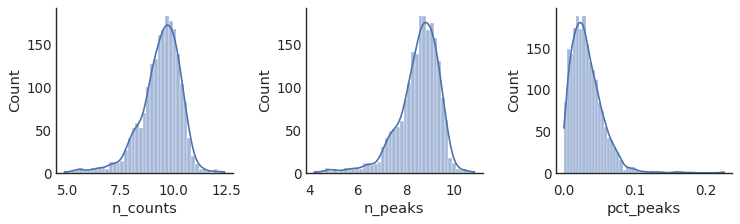

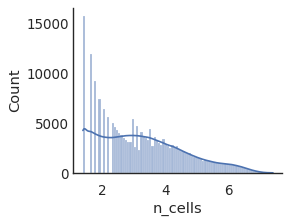

In [12]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'],fig_size=(3,3))

## Select peaks (optional)

> it will speed up the trainning process while only keeping peaks associated with top PCs

In [13]:
si.pp.pca(adata_CP, n_components=50)

the number of selected PC is: 50


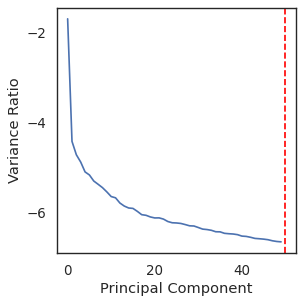

In [14]:
si.pl.pca_variance_ratio(adata_CP)

In [15]:
#The number of selected PCs can be further reduced
si.pp.select_pcs(adata_CP,n_pcs=50)

In [16]:
si.pp.select_pcs_features(adata_CP)

#features selected from PC 0: 33368
#features selected from PC 1: 33415
#features selected from PC 2: 33361
#features selected from PC 3: 33397
#features selected from PC 4: 33375
#features selected from PC 5: 33431
#features selected from PC 6: 33395
#features selected from PC 7: 33442
#features selected from PC 8: 33372
#features selected from PC 9: 33376
#features selected from PC 10: 33364
#features selected from PC 11: 33393
#features selected from PC 12: 33372
#features selected from PC 13: 33434
#features selected from PC 14: 33369
#features selected from PC 15: 33395
#features selected from PC 16: 33422
#features selected from PC 17: 33379
#features selected from PC 18: 33366
#features selected from PC 19: 33498
#features selected from PC 20: 33365
#features selected from PC 21: 33569
#features selected from PC 22: 33364
#features selected from PC 23: 33376
#features selected from PC 24: 33427
#features selected from PC 25: 33367
#features selected from PC 26: 33381
#features s

## Generate Graph

In [17]:
si.tl.gen_graph(list_CP=[adata_CP],
                copy=False,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: P
#edges: 12977763
Total number of edges: 12977763
Writing graph file "pbg_graph.txt" to "result_buenrostro2018_using_peaks_v4/pbg/graph0" ...
Finished.


## PBG training

In [18]:
dict_config = si.settings.pbg_params.copy()
## start training
# dict_config['wd'] = 0.0025
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, output='model')

Auto-estimated weight decay is 0.00273
Converting input data ...
[2021-04-13 09:14:23.473256] Using the 1 relation types given in the config
[2021-04-13 09:14:23.473736] Searching for the entities in the edge files...
[2021-04-13 09:14:40.647588] Entity type C:
[2021-04-13 09:14:40.648809] - Found 2034 entities
[2021-04-13 09:14:40.649106] - Removing the ones with fewer than 1 occurrences...
[2021-04-13 09:14:40.649748] - Left with 2034 entities
[2021-04-13 09:14:40.650028] - Shuffling them...
[2021-04-13 09:14:40.651563] Entity type P:
[2021-04-13 09:14:40.651833] - Found 134535 entities
[2021-04-13 09:14:40.652085] - Removing the ones with fewer than 1 occurrences...
[2021-04-13 09:14:40.671117] - Left with 134535 entities
[2021-04-13 09:14:40.671493] - Shuffling them...
[2021-04-13 09:14:40.762278] Preparing counts and dictionaries for entities and relation types:
[2021-04-13 09:14:40.771910] - Writing count of entity type C and partition 0
[2021-04-13 09:14:40.784715] - Writing cou

[2021-04-13 09:15:35.352027] - Processed 10800000 edges so far...
[2021-04-13 09:15:35.860959] - Processed 10900000 edges so far...
[2021-04-13 09:15:36.367092] - Processed 11000000 edges so far...
[2021-04-13 09:15:36.868717] - Processed 11100000 edges so far...
[2021-04-13 09:15:37.373257] - Processed 11200000 edges so far...
[2021-04-13 09:15:37.876729] - Processed 11300000 edges so far...
[2021-04-13 09:15:38.379947] - Processed 11400000 edges so far...
[2021-04-13 09:15:38.883253] - Processed 11500000 edges so far...
[2021-04-13 09:15:39.389791] - Processed 11600000 edges so far...
[2021-04-13 09:15:39.892746] - Processed 11700000 edges so far...
[2021-04-13 09:15:40.396133] - Processed 11800000 edges so far...
[2021-04-13 09:15:40.901723] - Processed 11900000 edges so far...
[2021-04-13 09:15:41.406266] - Processed 12000000 edges so far...
[2021-04-13 09:15:41.908083] - Processed 12100000 edges so far...
[2021-04-13 09:15:42.413730] - Processed 12200000 edges so far...
[2021-04-1

In [19]:
si.settings.pbg_params = dict_config.copy()

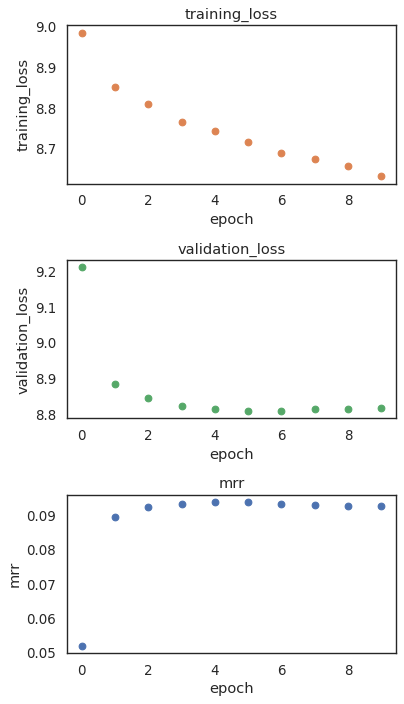

In [20]:
si.pl.pbg_metrics(fig_ncol=1)

In [21]:
si.pl.pbg_metrics(fig_ncol=1,save_fig=True,fig_name='graph0_model.pdf')

## Post-training Analysis

In [22]:
palette_celltype={'HSC':"#00441B", 'MPP':"#46A040", 'LMPP':"#00AF99", 'CMP':"#FFC179",'CLP':"#98D9E9",
                  'MEP':"#F6313E", 'GMP':"#FFA300", 'pDC':"#C390D4", 'mono':"#FF5A00",'UNK':"#333333"}

In [23]:
dict_adata = si.read_embedding()

In [24]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 2034 × 50,
 'P': AnnData object with n_obs × n_vars = 134535 × 50}

In [25]:
adata_C = dict_adata['C']  # embeddings for cells
adata_P = dict_adata['P']  # embeddings for peaks

In [26]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50

In [27]:
adata_P

AnnData object with n_obs × n_vars = 134535 × 50

### visualize embeddings of cells

In [28]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CP[adata_C.obs_names,:].obs['celltype'].copy()

In [29]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50
    obs: 'celltype'

In [30]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

In [31]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50
    obs: 'celltype'
    obsm: 'X_umap'

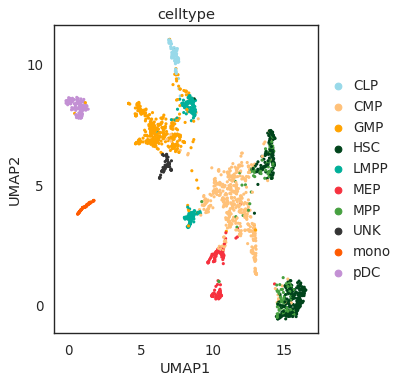

In [32]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},
           drawing_order='random')

In [33]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           save_fig=True,
           fig_name='umap_graph0_model.pdf')

In [34]:
adata_CP.write(os.path.join(workdir,'adata_CP.h5ad'))
adata_C.write(os.path.join(workdir,'adata_C.h5ad'))
adata_P.write(os.path.join(workdir,'adata_P.h5ad'))

... storing 'pbg_id' as categorical


In [35]:
adata_all = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_P])

Performing softmax transformation for query data 0;


In [36]:
## add annotations of all entities
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all.obs.loc[adata_P.obs_names, 'entity_anno'] = 'peak'

In [37]:
adata_all

AnnData object with n_obs × n_vars = 136569 × 50
    obs: 'celltype', 'id_dataset', 'entity_anno'

In [39]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

In [52]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['peak'] = "#e5c2c8"

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


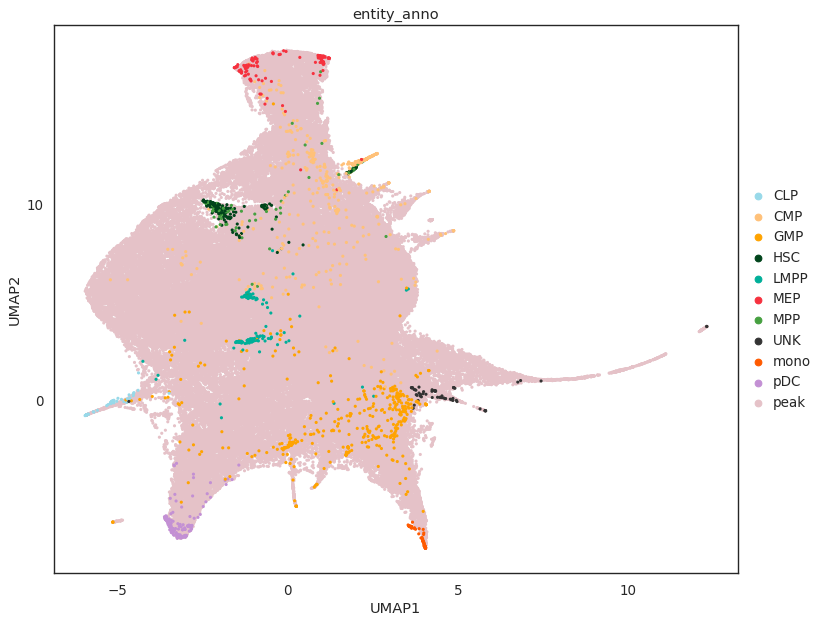

In [53]:
si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(10,8),
           drawing_order='original',
           show_texts=False)

In [43]:
adata_all.write(os.path.join(workdir,'adata_all.h5ad'))

... storing 'celltype' as categorical
... storing 'id_dataset' as categorical
... storing 'entity_anno' as categorical
